## Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

<center><img src='precip.png' /></center>

* Use Pandas to print the summary statistics for the precipitation data.

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

  <center><img src='temp_hist.png' height="10px" /></center>

### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

<center><img src='temp_avg.png' height="10px"/></center>



In [8]:
# Import required libraries and SQL Toolkit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql.expression import func
import datetime as dt


In [2]:
# Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
# Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measure', 'station']

In [4]:
#Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

Measurement = Base.classes.measure
Station = Base.classes.station

In [6]:
session = Session(engine)

In [7]:
#Check to see if all of the data was loaded and as what type
H_measure = session.query(Measurement).all()
len(H_measure), type(H_measure)


(18103, list)

In [21]:
precipitation= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= (dt.date.today() - dt.timedelta(days=365))).all()
type(percipitation)

list

In [99]:
precipitation_db= pd.DataFrame(precipitation).set_index('date')
precipitation_db.sort_index().head()

,prcp
date,
2017-01-22,0.16
2017-01-22,0.04
2017-01-22,0.09
2017-01-22,0.01
2017-01-22,0.72


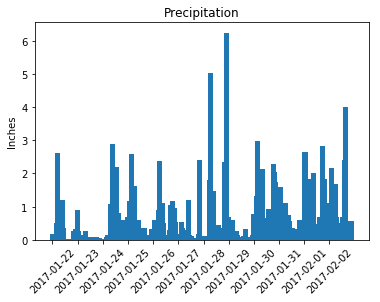

In [38]:
#Plot the results using the DataFrame plot method.

x = range(len(precipitation_db.index.values))
y = precipitation_db["prcp"]
plt.bar(x, y,width=20)
labels= percipitation_db.index.values
plt.xticks(range(len(precipitation_db.index.values)), labels, rotation=45)
plt.title("Precipitation")
plt.locator_params(nbins=12, axis= "x")
plt.ylabel('Inches')

plt.show()

In [45]:
# Design a query to calculate the total number of stations.

total_stations_s = session.query(Station.station).count()
total_stations_m = session.query(Measurement.station).group_by(Measurement.station).count()
total_stations_s, total_stations_m

(9, 9)

In [67]:
precipitation2= session.query(Measurement.station,func.sum(Measurement.tobs)).group_by(Measurement.station).order_by(func.sum(Measurement.tobs).desc()).all()
precipitation2

[('USC00519397', 200205),
 ('USC00519281', 198652),
 ('USC00513117', 195940),
 ('USC00519523', 191698),
 ('USC00516128', 176029),
 ('USC00514830', 144913),
 ('USC00511918', 138191),
 ('USC00517948', 50943),
 ('USC00518838', 24855)]

In [100]:
tobs_12_months= session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519397").filter(Measurement.date >= (dt.date.today() - dt.timedelta(days=365))).all()
tobs_12_months

[('2017-01-22', 72),
 ('2017-01-23', 72),
 ('2017-01-24', 69),
 ('2017-01-25', 72),
 ('2017-01-26', 71),
 ('2017-01-27', 65),
 ('2017-01-28', 64),
 ('2017-01-29', 67),
 ('2017-01-30', 67),
 ('2017-01-31', 68),
 ('2017-02-01', 70),
 ('2017-02-02', 61),
 ('2017-02-03', 65),
 ('2017-02-04', 72),
 ('2017-02-05', 73),
 ('2017-02-06', 76),
 ('2017-02-07', 64),
 ('2017-02-08', 62),
 ('2017-02-09', 61),
 ('2017-02-10', 71),
 ('2017-02-11', 69),
 ('2017-02-12', 68),
 ('2017-02-13', 74),
 ('2017-02-14', 75),
 ('2017-02-15', 75),
 ('2017-02-16', 71),
 ('2017-02-17', 71),
 ('2017-02-18', 68),
 ('2017-02-19', 69),
 ('2017-02-20', 71),
 ('2017-02-21', 70),
 ('2017-02-22', 72),
 ('2017-02-23', 74),
 ('2017-02-24', 70),
 ('2017-02-25', 64),
 ('2017-02-26', 65),
 ('2017-02-27', 72),
 ('2017-02-28', 74),
 ('2017-03-01', 66),
 ('2017-03-02', 73),
 ('2017-03-03', 69),
 ('2017-03-04', 74),
 ('2017-03-05', 71),
 ('2017-03-06', 69),
 ('2017-03-07', 68),
 ('2017-03-08', 71),
 ('2017-03-09', 72),
 ('2017-03-10

In [95]:
tobs12= pd.DataFrame(tobs_12_months).set_index('date')
tobs12.tobs[0:5]

date
2017-01-22    72
2017-01-23    72
2017-01-24    69
2017-01-25    72
2017-01-26    71
Name: tobs, dtype: int64

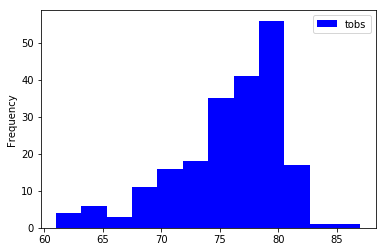

In [98]:
#Plot the results as a histogram with bins=12.

num_bins = 12
x= tobs12['tobs']
plt.hist(x,num_bins, color='blue')
plt.legend(tobs12)
plt.ylabel('Frequency')

plt.show()

In [101]:
start_date='2015-05-10'
end_date='2015-05-25'

In [103]:
# Temperature Analysis
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
# and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps (start, end):
    min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    
    return min_temp, max_temp, avg_temp
    
temperature = calc_temps(start_date, end_date)
temperature

([(64)], [(79)], [(73.14150943396227)])

In [144]:

avgb= temperature[2]
maxbs= temperature[1]
minbs= temperature[0]
maxb = tuple(maxbs)[0]
minb = tuple(minbs)[0]
avb= tuple(avgb)[0]
minb2 = minb[0]
maxb2 = maxb[0]
av= avb[0]
tbs= maxb2-minb2
tbs

15

Text(0,0.5,'Temp (F)')

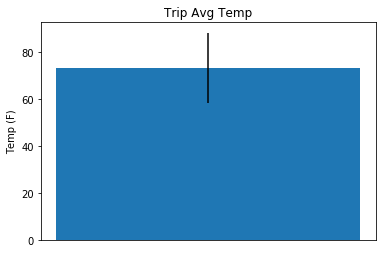

In [166]:

plt.bar(maxb2,height=av, yerr=tbs, align='center',width=.5)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')